In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)

df = pd.read_csv('train.csv', sep=',')

kaggle_test = pd.read_csv('test.csv', sep=',')

In [179]:
# just a pretty random tryout
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

# show some data samples to get a feeling about the data
print('\n************************* df.head():')
print(df.head())
# to note:
# * what is the difference between passenger id and ticket number?

# some descriptive statistics
print('\n************************* df.describe():')
print(df.describe())

# find out the types of the features and find the features that contain missing data (NaN)
print('\n************************* df.info():')
print(df.info())

df['IsMale'] = df['Sex'] == 'male'
kaggle_test['IsMale'] = kaggle_test['Sex'] == 'male'

df['IsAdult'] = np.where(df['Age'].isnull(), np.nan, df['Age'] >= 18)

% of men who survived: 0.18890814558058924

************************* df.head():
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803 

 in these columns. You can adjust


Parch = parent/children\
Embarked = poort van instappen. S = Southampton, Q = Queenstown, C = Cherbourg\
sibsp = Sibling/Spouse

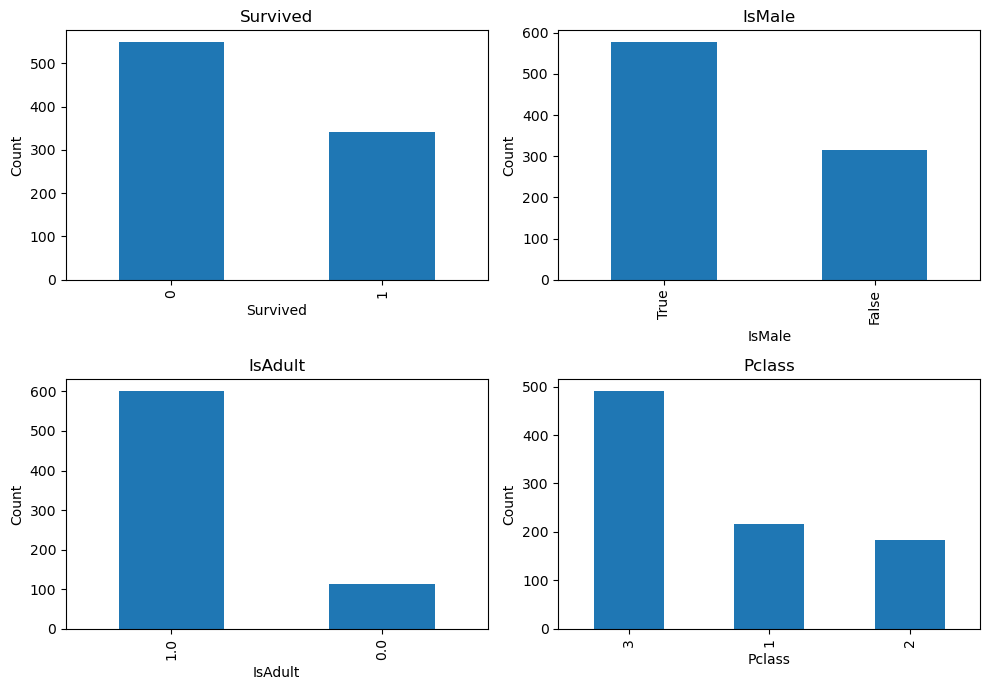

In [180]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

df['Survived'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Survived')

df['IsMale'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('IsMale')

df['IsAdult'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('IsAdult')

df['Pclass'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Pclass')

plt.tight_layout()

plt.show()

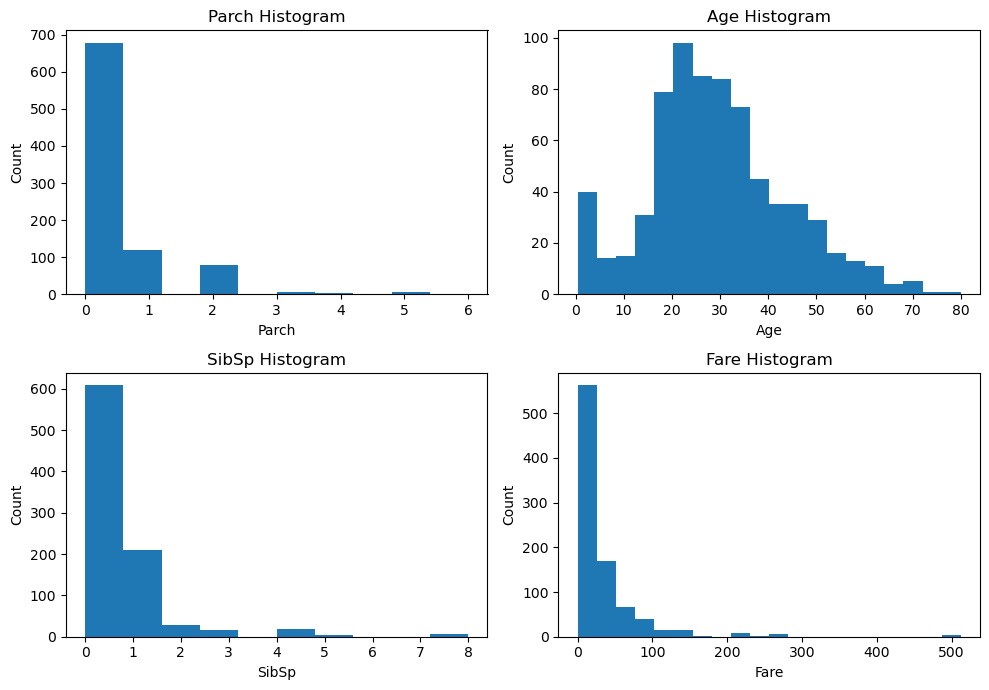

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Plot the first histogram on the top-left subplot
axes[0, 0].hist(df['Parch'])
axes[0, 0].set_xlabel('Parch')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Parch Histogram')

# Plot the second histogram on the top-right subplot
axes[0, 1].hist(df['Age'], bins=20)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Histogram')

# Plot the third histogram on the bottom-left subplot
axes[1, 0].hist(df['SibSp'])
axes[1, 0].set_xlabel('SibSp')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('SibSp Histogram')

# Plot the fourth histogram on the bottom-right subplot
axes[1, 1].hist(df['Fare'], bins=20)
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Fare Histogram')

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Show the combined figure
plt.show()

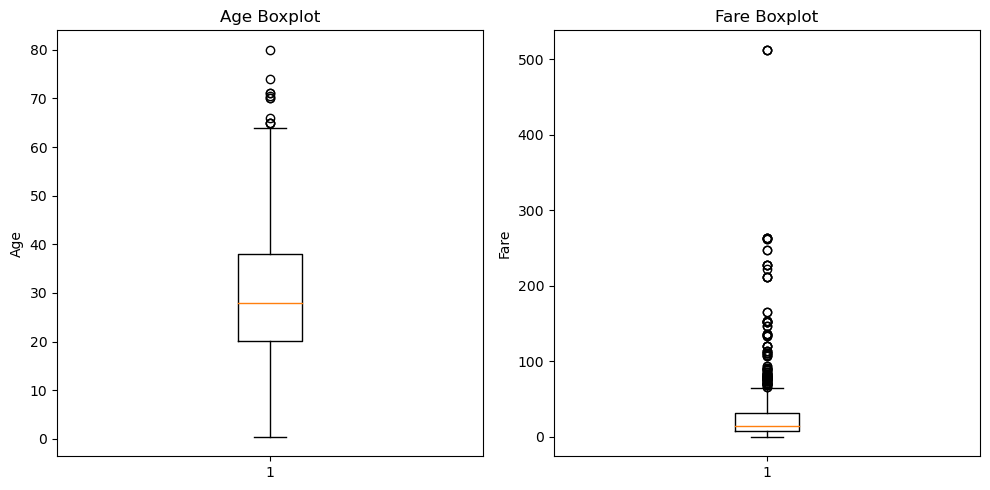

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(df['Age'].dropna())
axes[0].set_ylabel('Age')
axes[0].set_title('Age Boxplot')

axes[1].boxplot(df['Fare'])
axes[1].set_ylabel('Fare')
axes[1].set_title('Fare Boxplot')

plt.tight_layout()

plt.show()

12474

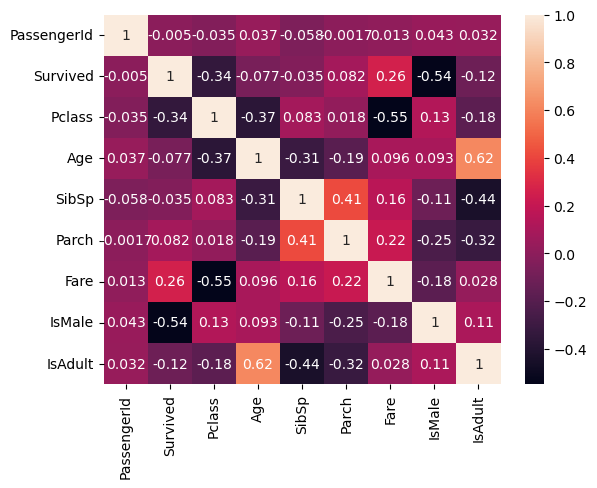

In [183]:
numeric_df = df.select_dtypes(include=['number', 'bool'])
sns.heatmap(numeric_df.corr(), annot=True)
df.size

In [184]:
nan_ages = df[df['Age'].isna()]
#nan_ages[nan_ages['IsMale'] == 0].count()
#nan_ages[nan_ages['IsMale'] == 1].count()

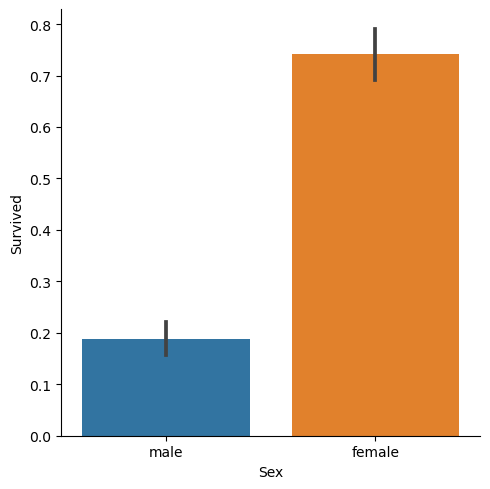

In [185]:
sns.catplot(y="Survived", x="Sex", kind="bar", data=df);

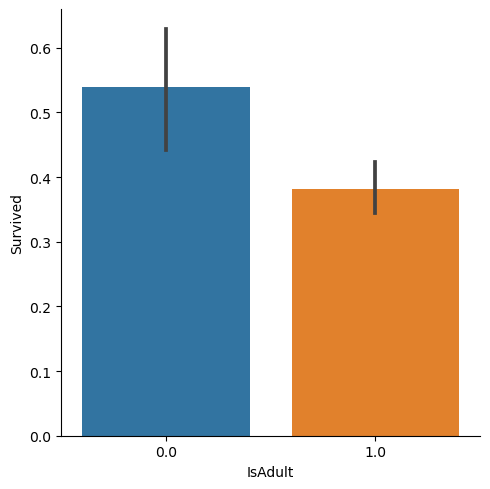

In [186]:
sns.catplot(y="Survived", x="IsAdult", kind="bar", data=df);

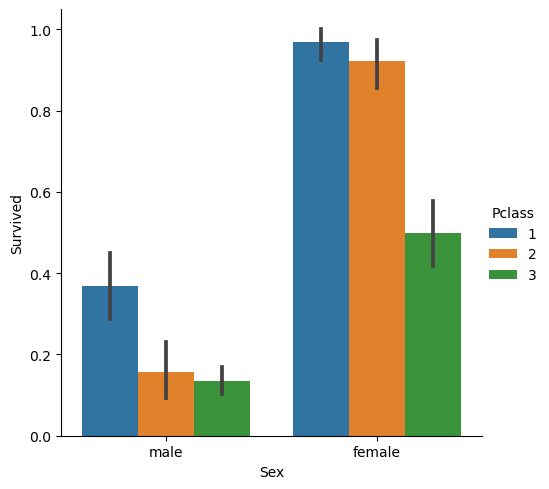

In [187]:
sns.catplot(y="Survived", hue="Pclass", x="Sex", kind="bar", data=df)


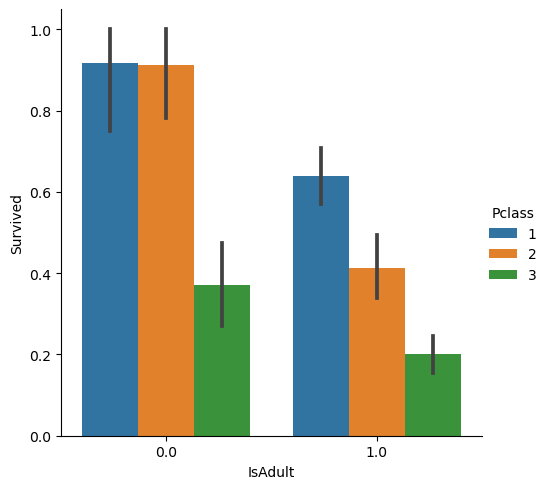

In [188]:
sns.catplot(y="Survived", hue="Pclass", x="IsAdult", kind="bar", data=df)

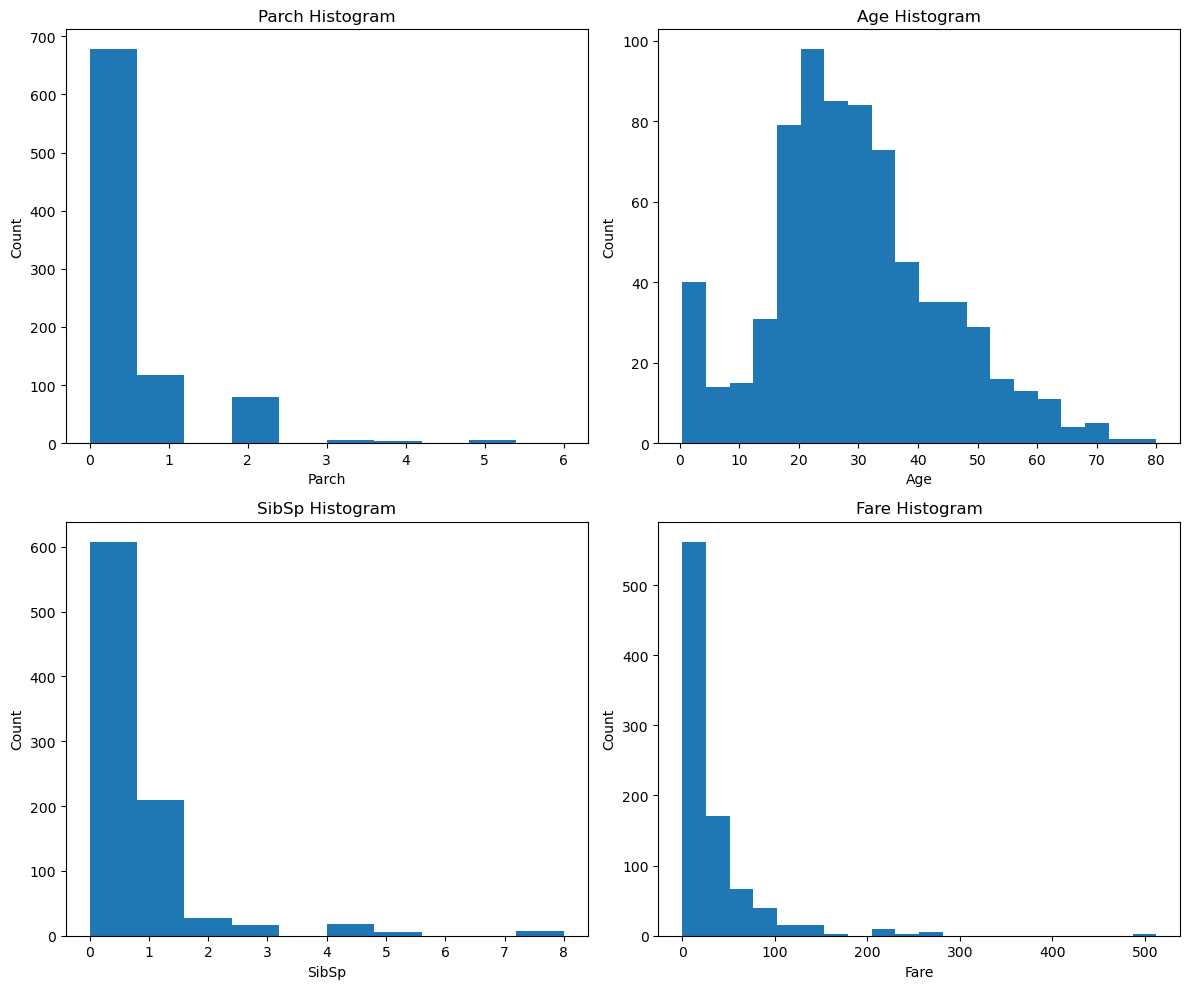

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(df['Parch'])
axes[0, 0].set_xlabel('Parch')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Parch Histogram')

axes[0, 1].hist(df['Age'], bins=20)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Histogram')

axes[1, 0].hist(df['SibSp'])
axes[1, 0].set_xlabel('SibSp')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('SibSp Histogram')

# Plot the fourth histogram on the bottom-right subplot
axes[1, 1].hist(df['Fare'], bins=20)
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Fare Histogram')

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Show the combined figure
plt.show()

In [190]:
df_filtered = df.filter(['Survived', 'IsMale', 'Pclass', 'Fare'])
df_train, df_test = train_test_split(df_filtered, test_size=0.3, stratify=df_filtered['Survived'], random_state=42)
print(df_train.shape, df_test.shape)
df_train


(623, 4) (268, 4)


,Survived,Pclass,Fare,IsMale
748,0,1,53.1000,True
45,0,3,8.0500,True
28,1,3,7.8792,False
633,0,1,0.0000,True
403,0,3,15.8500,True
720,1,2,33.0000,False
209,1,1,31.0000,True
695,0,2,13.5000,True
493,0,1,49.5042,True
844,0,3,8.6625,True


In [191]:
from sklearn.tree import DecisionTreeClassifier


X = df_train.iloc[:,1:]

y = df_train['Survived']

# Create and fit the DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [192]:
from sklearn import tree
import graphviz

def plot_tree(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=['not survived', 'survived'],  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

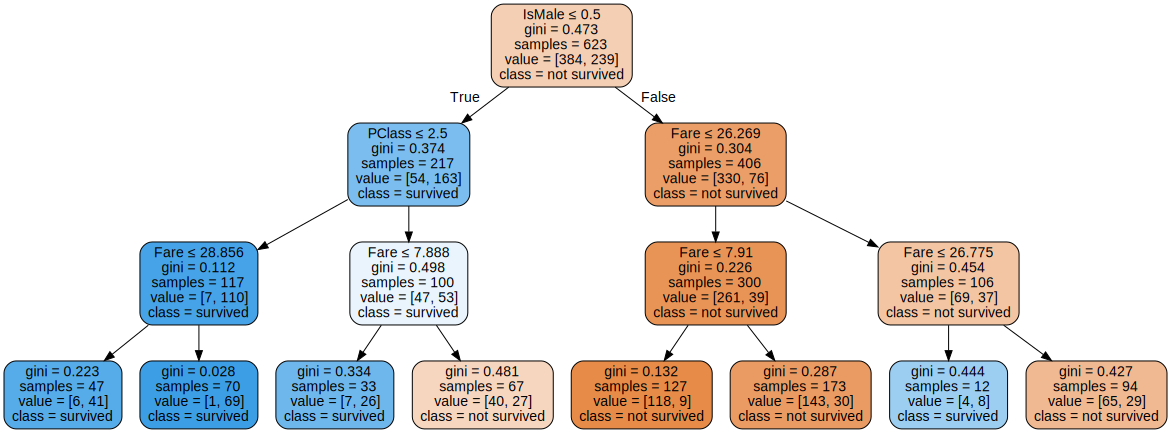

In [193]:
plot_tree(dt, ['PClass', 'Fare', 'IsMale'])

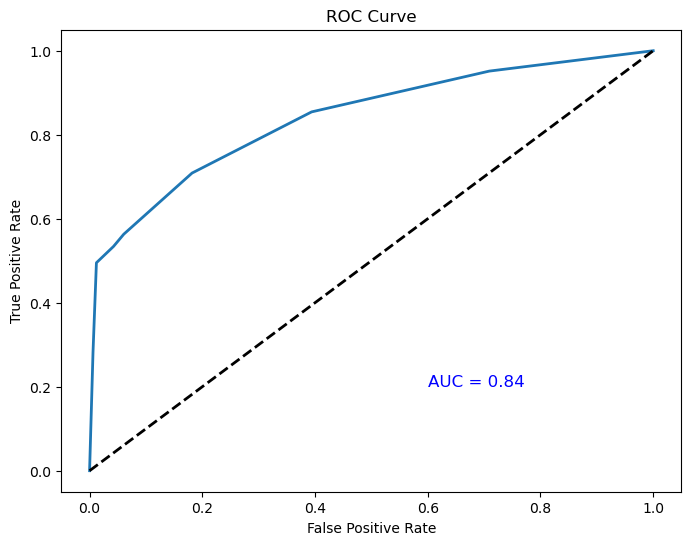

In [194]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your decision tree model 'dt' and have test data 'df_test'
X_test = df_test[['Pclass', 'Fare', 'IsMale']]  # Features
y_test = df_test['Survived']  # True labels

# Predict probabilities of the positive class (1)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add AUC value as a text label
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='blue')

plt.show()

AUC-ROC Score: 0.85


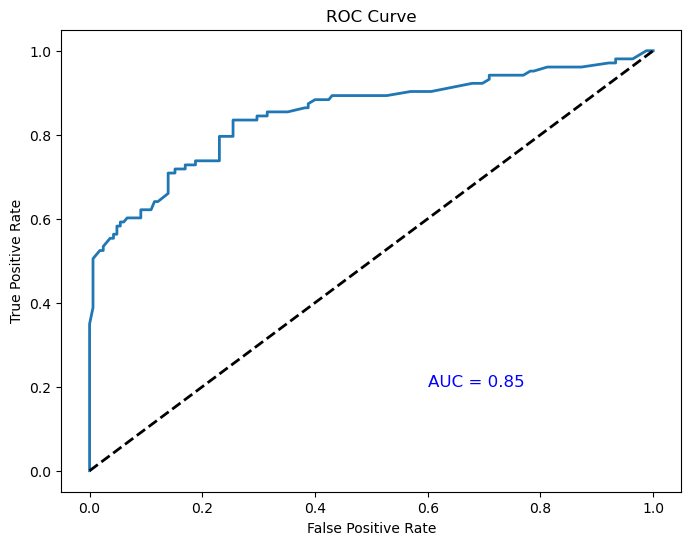

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have your training and testing data: df_train and df_test

# Select features and target variable
X_train = df_train[['Pclass', 'Fare', 'IsMale']]  # Features
y_train = df_train['Survived']  # Target variable
X_test = df_test[['Pclass', 'Fare', 'IsMale']]  # Test features
y_test = df_test['Survived']  # True labels

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)  # You can adjust the number of trees (n_estimators) as needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict probabilities of the positive class (1)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC-ROC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add AUC value as a text label
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='blue')

plt.show()

In [197]:
fare_mean = kaggle_test['Fare'].mean()
kaggle_test['Fare'] = kaggle_test['Fare'].fillna(fare_mean)

kaggle_test = kaggle_test.filter(['Survived', 'IsMale', 'Pclass', 'Fare', 'PassengerId']).dropna()

X_kaggle_test = kaggle_test[['Pclass', 'Fare', 'IsMale']]  # Adjust the feature selection as needed

# Make predictions on the Kaggle test dataset
predictions_forest = rf.predict(X_kaggle_test)
predictions_tree = dt.predict(X_kaggle_test)


# Create a DataFrame to store the predictions along with any required IDs or indices
kaggle_predictions_forest = pd.DataFrame({'PassengerId': kaggle_test['PassengerId'], 'Survived': predictions_forest})
kaggle_predictions_tree = pd.DataFrame({'PassengerId': kaggle_test['PassengerId'], 'Survived': predictions_tree})


# Save the predictions to a CSV file (adjust the file name as needed)
kaggle_predictions_forest.to_csv('kaggle_predictions_forest.csv', index=False)
kaggle_predictions_tree.to_csv('kaggle_predictions_tree.csv', index=False)

